Virtual Internship Program @ AINE.AI
Submitted by: Siddharth Das

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [2]:
data1=pd.read_csv('brics.csv')
data1.head()

,code,country,population,area,capital
0,BR,Brazil,200,8515767,Brasilia
1,RU,Russia,144,17098242,Moscow
2,IN,India,1252,3287590,New Delhi
3,CH,China,1357,9596961,Beijing
4,SA,South Africa,55,1221037,Pretoria


In [3]:
# Data type of any variable can be seen using the function type()

print(type(5))
print(type('a text'))
print(type(True))
print(type(data1))         # datatype of the dataframe created above

<class 'int'>
<class 'str'>
<class 'bool'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
data1.value_counts()

code  country       population  area      capital  
SA    South Africa  55          1221037   Pretoria     1
RU    Russia        144         17098242  Moscow       1
IN    India         1252        3287590   New Delhi    1
CH    China         1357        9596961   Beijing      1
BR    Brazil        200         8515767   Brasilia     1
dtype: int64

In [5]:
# TO DO: Sort the data to see which country has largest population ( population is in millions).
data1.sort_values(by=['population'],ascending='True')


,code,country,population,area,capital
4,SA,South Africa,55,1221037,Pretoria
1,RU,Russia,144,17098242,Moscow
0,BR,Brazil,200,8515767,Brasilia
2,IN,India,1252,3287590,New Delhi
3,CH,China,1357,9596961,Beijing


China has the largest population

In [6]:
data1.sort_values(by=['area'],ascending='True')

,code,country,population,area,capital
4,SA,South Africa,55,1221037,Pretoria
2,IN,India,1252,3287590,New Delhi
0,BR,Brazil,200,8515767,Brasilia
3,CH,China,1357,9596961,Beijing
1,RU,Russia,144,17098242,Moscow


South Africa is smallest in size

In [7]:
data1.sort_values(by=['area'],ascending=False)

,code,country,population,area,capital
1,RU,Russia,144,17098242,Moscow
3,CH,China,1357,9596961,Beijing
0,BR,Brazil,200,8515767,Brasilia
2,IN,India,1252,3287590,New Delhi
4,SA,South Africa,55,1221037,Pretoria


In [8]:
data1['area'].sort_values(ascending=False)

1    17098242
3     9596961
0     8515767
2     3287590
4     1221037
Name: area, dtype: int64

In [9]:
print(data1["country"])

0          Brazil
1          Russia
2           India
3           China
4    South Africa
Name: country, dtype: object


In [10]:
# TO DO: Print area column from brics dataframe
print(data1["area"])

0     8515767
1    17098242
2     3287590
3     9596961
4     1221037
Name: area, dtype: int64


In [11]:
# TO DO:  Print code column from the dataframe using dot
data1.country

0          Brazil
1          Russia
2           India
3           China
4    South Africa
Name: country, dtype: object

In [12]:
data1[['country','capital','population']]

,country,capital,population
0,Brazil,Brasilia,200
1,Russia,Moscow,144
2,India,New Delhi,1252
3,China,Beijing,1357
4,South Africa,Pretoria,55


In [13]:
# use col 0 as index. 
# This will remove the 1st column containing the index or sl. no. from the above output, 
# and make the 1st column from actual data as the index.

data2 = pd.read_csv("brics.csv",index_col=0)
data2

# Note that the 'code' will be used as Index only and not as a part of data anymore.

,country,population,area,capital
code,,,,
BR,Brazil,200,8515767,Brasilia
RU,Russia,144,17098242,Moscow
IN,India,1252,3287590,New Delhi
CH,China,1357,9596961,Beijing
SA,South Africa,55,1221037,Pretoria


Transforming the dataframe

In [14]:
#Adding a new column to the existing Data Frame
data2["on_earth"] = [True, True, True, True, True]    

# We are adding a list here. Read more on lists: https://www.w3schools.com/python/python_lists.asp

data2

,country,population,area,capital,on_earth
code,,,,,
BR,Brazil,200,8515767,Brasilia,True
RU,Russia,144,17098242,Moscow,True
IN,India,1252,3287590,New Delhi,True
CH,China,1357,9596961,Beijing,True
SA,South Africa,55,1221037,Pretoria,True


In [15]:
# adding a calculated column
data2["density"] = data2["population"] / data2["area"] * 1000000   # per km sq.
data2

,country,population,area,capital,on_earth,density
code,,,,,,
BR,Brazil,200,8515767,Brasilia,True,23.485847
RU,Russia,144,17098242,Moscow,True,8.421918
IN,India,1252,3287590,New Delhi,True,380.826076
CH,China,1357,9596961,Beijing,True,141.398928
SA,South Africa,55,1221037,Pretoria,True,45.043680


In [16]:
data2.style.set_precision(2)  # Upto 2 decimal points for all float columns in the dataframe. 

# This WILL NOT change the original dataframe i.e. the original dataframe will still have multiple digits after decimals.

,country,population,area,capital,on_earth,density
code,,,,,,
BR,Brazil,200,8515767,Brasilia,True,23.49
RU,Russia,144,17098242,Moscow,True,8.42
IN,India,1252,3287590,New Delhi,True,380.83
CH,China,1357,9596961,Beijing,True,141.40
SA,South Africa,55,1221037,Pretoria,True,45.04


In [17]:
data2["density"].round(2) # Rounding of individual column to fixed decimal points.

code
BR     23.49
RU      8.42
IN    380.83
CH    141.40
SA     45.04
Name: density, dtype: float64

# Fetching data using indices and location functions (.loc and .iloc)

To Note:
1. .loc is used with the actual value/label of the index
2. .iloc is used with the index position/reference - which are numbers (0, 1, 2, 3, 4......)

Look at the below code cells to understand the difference. 

In [18]:
data2.loc["SA"]     # .loc is used with actual value of the index. 
# The value mentioned in the argument must be there in the dataframe's index list.

country       South Africa
population              55
area               1221037
capital           Pretoria
on_earth              True
density            45.0437
Name: SA, dtype: object

In [19]:
data2.iloc[4]  # .loc is used when we are giving the index reference as number, not the actual value of the index.

country       South Africa
population              55
area               1221037
capital           Pretoria
on_earth              True
density            45.0437
Name: SA, dtype: object

In [20]:
# TO DO: Use .loc to print the values from all columns for IN
data2.loc["IN"]



country           India
population         1252
area            3287590
capital       New Delhi
on_earth           True
density         380.826
Name: IN, dtype: object

In [21]:
# TO DO: Use .iloc to print the values from all columns from 3rd row (index number will be 1 less than the row number).
data2.iloc[2]


country           India
population         1252
area            3287590
capital       New Delhi
on_earth           True
density         380.826
Name: IN, dtype: object

# Adding rows in the dataframe

append() is used to add records in a dataframe or even in lists.

In [22]:
#ading a new ROW using append
newrow = {'code':'WK', 'country':'Wakanda', 'population':5,'area':1000000,'capital':'Wakanda City','on_earth':False,'density':5}
data3 = data2.append(newrow,ignore_index=True)   # Ignoring the existing index.
# Ignoring the existing index will result into new dataframe index 0,1,2,....

'''
Why there is NaN for code in other rows?  
Because the previous 'code' was not a part of datatable. It was an index.
With 'code' in 'newrow', we are adding a new column called 'code'
'''

'''
ignore_index=False will result into error because 'newrow' is a dictionary
and appending a dictionary into a dataframe will not work if we do not ignore the index.
'''
data3   # append will not result into chaning the actual dataframe. brics will still be the same

,country,population,area,capital,on_earth,density,code
0,Brazil,200,8515767,Brasilia,True,23.485847,NaN
1,Russia,144,17098242,Moscow,True,8.421918,NaN
2,India,1252,3287590,New Delhi,True,380.826076,NaN
3,China,1357,9596961,Beijing,True,141.398928,NaN
4,South Africa,55,1221037,Pretoria,True,45.043680,NaN
5,Wakanda,5,1000000,Wakanda City,False,5.000000,WK


In [23]:
#Adding a new row using .loc
data2.loc['WK'] = ['Wakanda', 5, 1000000, 'Wakanda City', False, 5]   
# Sequence is very important. Data types may get changed due to wrong sequence.
data2


,country,population,area,capital,on_earth,density
code,,,,,,
BR,Brazil,200,8515767,Brasilia,True,23.485847
RU,Russia,144,17098242,Moscow,True,8.421918
IN,India,1252,3287590,New Delhi,True,380.826076
CH,China,1357,9596961,Beijing,True,141.398928
SA,South Africa,55,1221037,Pretoria,True,45.043680
WK,Wakanda,5,1000000,Wakanda City,False,5.000000


In [24]:
data3=data2.copy()

In [25]:
# TO DO: Add a new row in the dataframe using .loc any other country with some values in all columns.
data3.loc['PAK']=['Pakistan', 80, 2000000, 'Islamabad', True, 40]
data3



,country,population,area,capital,on_earth,density
code,,,,,,
BR,Brazil,200,8515767,Brasilia,True,23.485847
RU,Russia,144,17098242,Moscow,True,8.421918
IN,India,1252,3287590,New Delhi,True,380.826076
CH,China,1357,9596961,Beijing,True,141.398928
SA,South Africa,55,1221037,Pretoria,True,45.043680
WK,Wakanda,5,1000000,Wakanda City,False,5.000000
PAK,Pakistan,80,2000000,Islamabad,True,40.000000


#### Deleting rows and columns from a dataframe using drop()

In [26]:
# Lets create a new dataframe so that brics is not affected.

data3 = data2
data3

,country,population,area,capital,on_earth,density
code,,,,,,
BR,Brazil,200,8515767,Brasilia,True,23.485847
RU,Russia,144,17098242,Moscow,True,8.421918
IN,India,1252,3287590,New Delhi,True,380.826076
CH,China,1357,9596961,Beijing,True,141.398928
SA,South Africa,55,1221037,Pretoria,True,45.043680
WK,Wakanda,5,1000000,Wakanda City,False,5.000000


In [27]:
data3.drop(['area'], axis=1)  # axis = 0 by default for rows. Axis = 1 for column.

# For multiple columns, mention the columns separated by comma. Ex. df.drop(['name','max'], axis=1)

,country,population,capital,on_earth,density
code,,,,,
BR,Brazil,200,Brasilia,True,23.485847
RU,Russia,144,Moscow,True,8.421918
IN,India,1252,New Delhi,True,380.826076
CH,China,1357,Beijing,True,141.398928
SA,South Africa,55,Pretoria,True,45.043680
WK,Wakanda,5,Wakanda City,False,5.000000


In [28]:
data3=data2


In [29]:
# TO DO: Try deleting area and density columns from data3 dataframe
data3.drop(['area','density'],axis=1)


,country,population,capital,on_earth
code,,,,
BR,Brazil,200,Brasilia,True
RU,Russia,144,Moscow,True
IN,India,1252,New Delhi,True
CH,China,1357,Beijing,True
SA,South Africa,55,Pretoria,True
WK,Wakanda,5,Wakanda City,False


In [30]:
# TO DO: Delete the record for Wakanda by using its index WK
# Hint: Use WK as identifier and delete axis argument or put axis = 0
data3.drop(['WK'],axis=0)



,country,population,area,capital,on_earth,density
code,,,,,,
BR,Brazil,200,8515767,Brasilia,True,23.485847
RU,Russia,144,17098242,Moscow,True,8.421918
IN,India,1252,3287590,New Delhi,True,380.826076
CH,China,1357,9596961,Beijing,True,141.398928
SA,South Africa,55,1221037,Pretoria,True,45.043680


In [31]:
data4=data2

# Another way to drop columns
data4.drop(columns=['area', 'density']) 

,country,population,capital,on_earth
code,,,,
BR,Brazil,200,Brasilia,True
RU,Russia,144,Moscow,True
IN,India,1252,New Delhi,True
CH,China,1357,Beijing,True
SA,South Africa,55,Pretoria,True
WK,Wakanda,5,Wakanda City,False


In [32]:
data4 = data2

# Drop rows by index

data4.drop(['IN', 'CH'])

,country,population,area,capital,on_earth,density
code,,,,,,
BR,Brazil,200,8515767,Brasilia,True,23.485847
RU,Russia,144,17098242,Moscow,True,8.421918
SA,South Africa,55,1221037,Pretoria,True,45.043680
WK,Wakanda,5,1000000,Wakanda City,False,5.000000


In [33]:
# The shape function helps us to find the shape or size of an array or matrix. In Excel - A1:D10.  
# shape[0] means we are working along the first dimension of your array.
# If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n.

for index in range(data2.shape[0]):    
    countryName = data2.iloc[index,0]  # row - index, column - 0
    cityName = data2.iloc[index, 3]  # row - index, column - 3
    print('The Capital City of', countryName, 'is', cityName)


The Capital City of Brazil is Brasilia
The Capital City of Russia is Moscow
The Capital City of India is New Delhi
The Capital City of China is Beijing
The Capital City of South Africa is Pretoria
The Capital City of Wakanda is Wakanda City


In [34]:
#Another solution
for index in range(data2.shape[0]):
    print('The Capital City of', data2.iloc[index, 0], 'is', data2.iloc[index, 3])

The Capital City of Brazil is Brasilia
The Capital City of Russia is Moscow
The Capital City of India is New Delhi
The Capital City of China is Beijing
The Capital City of South Africa is Pretoria
The Capital City of Wakanda is Wakanda City


In [35]:
#Another solution
# iterrows() is a generator that iterates over the rows of the dataframe and returns the index of each row, 
# in addition to an object containing the row itself.

for index, row in data2.iterrows():
    print("The Capital City of",row['country'],"is", row['capital'])

The Capital City of Brazil is Brasilia
The Capital City of Russia is Moscow
The Capital City of India is New Delhi
The Capital City of China is Beijing
The Capital City of South Africa is Pretoria
The Capital City of Wakanda is Wakanda City


In [36]:
data6=pd.read_csv('cars.csv')
data6.head()

,Unnamed: 0,cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True


In [37]:
data6.tail()

,Unnamed: 0,cars_per_cap,country,drives_right
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [38]:
# Giving a name to the unnamed column

print(data6)

data7 = data6.rename( columns={'Unnamed: 0':'code'}, inplace=False ) 
data7.rename( columns={'Unnamed: 0':'code'}, inplace=True ) 

print(data7)
print(data6)      # With False, there will be no change in cars dataframe.



'''
inplace = True has been used to overwrite the existing dataframe. The default is False, if nothing mentioned.
When inplace = True , the data is modified in place, which means it will return nothing 
and the dataframe is now updated. 
When inplace = False , which is the default, 
then the operation is performed and it returns a copy of the object. You then need to save it to something.'''

  Unnamed: 0  cars_per_cap        country  drives_right
0         US           809  United States          True
1        AUS           731      Australia         False
2        JAP           588          Japan         False
3         IN            18          India         False
4         RU           200         Russia          True
5        MOR            70        Morocco          True
6         EG            45          Egypt          True
  code  cars_per_cap        country  drives_right
0   US           809  United States          True
1  AUS           731      Australia         False
2  JAP           588          Japan         False
3   IN            18          India         False
4   RU           200         Russia          True
5  MOR            70        Morocco          True
6   EG            45          Egypt          True
  Unnamed: 0  cars_per_cap        country  drives_right
0         US           809  United States          True
1        AUS           731      Australi

'\ninplace = True has been used to overwrite the existing dataframe. The default is False, if nothing mentioned.\nWhen inplace = True , the data is modified in place, which means it will return nothing \nand the dataframe is now updated. \nWhen inplace = False , which is the default, \nthen the operation is performed and it returns a copy of the object. You then need to save it to something.'

In [39]:
print(data6[['cars_per_cap']])  # print the actual data

   cars_per_cap
0           809
1           731
2           588
3            18
4           200
5            70
6            45


In [40]:
# TO DO : Print the details of RU
# Hint: You should use either .loc or .iloc (just one is correct).
data6.set_index('Unnamed: 0')
data6.head()
result=data6.loc[data6['Unnamed: 0']=='RU']
result


,Unnamed: 0,cars_per_cap,country,drives_right
4,RU,200,Russia,True


In [41]:
# TO DO: Can you change the above answer to show the column name at the top? 
# Hint: Recap last 3-4 code cells.
df_t=result.T
df_t

,4
Unnamed: 0,RU
cars_per_cap,200
country,Russia
drives_right,True


In [42]:
# TO DO: Print all details for RU and AUS from cars dataframe.
result=data6.loc[(data6['Unnamed: 0']=='RU')|(data6['Unnamed: 0']=='AUS')]
result

,Unnamed: 0,cars_per_cap,country,drives_right
1,AUS,731,Australia,False
4,RU,200,Russia,True


In [43]:
# Print the Cars Per Capita (cars_per_cap) for India (IN).
IN=data6.loc[data6['Unnamed: 0']=='IN']
IN['cars_per_cap']



3    18
Name: cars_per_cap, dtype: int64

In [44]:
# Print the Cars Per Capita (cars_per_cap) for India (IN) and Russia (RU).
INRS=data6.loc[(data6['Unnamed: 0']=='IN')|(data6['Unnamed: 0']=='RU')]
INRS['cars_per_cap']



3     18
4    200
Name: cars_per_cap, dtype: int64

In [45]:
# Print the Cars Per Capita and Country name for India and Russia
INRS=data6.loc[(data6['Unnamed: 0']=='IN')|(data6['Unnamed: 0']=='RU')]
INRS[['country','cars_per_cap']]




,country,cars_per_cap
3,India,18
4,Russia,200


Dateset to use: marks.csv

In [46]:
data9=pd.read_csv('marks.csv')
data9.head()

,Student_ID,Student_Name,English,Maths,Science,History,Social_Studies
0,S01,Alice,96.874050,15.367999,58.682033,59.690510,61.373070
1,S02,Bob,5.462131,81.032680,83.171957,45.664012,80.805730
2,S03,Charlie,60.753099,65.219548,99.323628,24.281512,58.057612
3,S04,David,21.160844,95.052971,35.860852,62.865185,95.264572
4,S05,Edward,63.250994,60.693247,7.020915,60.505272,34.041671


In [47]:
# TO DO: Show the shape of the dataframe
# Hint: shape()
data9.shape


(20, 7)

In [48]:
print(type(data9))
print(type(data9.English))  # Column's dtype is Series, the dtype of the values is Object.
print(type(5))
print(type(5.5))
print(type("Python"))
print(type(True))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'int'>
<class 'float'>
<class 'str'>
<class 'bool'>


Do you know the difference between = and == ?

In [49]:
num = 5 # Assignment. No output of assignment operator. 
num

num == 6 # Comparison/equality. Output is either True or False

False

In [50]:
# selecting marks for 'Ria'
display(data9.loc[(data9.Student_Name == 'Ria')])  # in case the index is not known for large datasets

,Student_ID,Student_Name,English,Maths,Science,History,Social_Studies
17,S18,Ria,30.830802,25.545682,84.27165,78.727155,7.30567


In [51]:
# TO DO: Print all records for David
display(data9.loc[(data9.Student_Name == 'David')])


,Student_ID,Student_Name,English,Maths,Science,History,Social_Studies
3,S04,David,21.160844,95.052971,35.860852,62.865185,95.264572


In [52]:
# Using OR operator to print details if the name is either 'Ria' OR 'David'
display(data9.loc[(data9.Student_Name == 'Ria') | (data9.Student_Name == 'David')])   



,Student_ID,Student_Name,English,Maths,Science,History,Social_Studies
3,S04,David,21.160844,95.052971,35.860852,62.865185,95.264572
17,S18,Ria,30.830802,25.545682,84.271650,78.727155,7.305670


In [53]:
# TO DO: Print all records is the Student IS is either S05 or S10
display(data9.loc[(data9.Student_ID == 'S05') | (data9.Student_Name == 'S10')])


,Student_ID,Student_Name,English,Maths,Science,History,Social_Studies
4,S05,Edward,63.250994,60.693247,7.020915,60.505272,34.041671


In [54]:
# TO DO: Fetch all details where marks in English > 70 or marks in Maths > 70.

display(data9.loc[(data9.English > 70) | (data9.Maths > 70)])


,Student_ID,Student_Name,English,Maths,Science,History,Social_Studies
0,S01,Alice,96.874050,15.367999,58.682033,59.690510,61.373070
1,S02,Bob,5.462131,81.032680,83.171957,45.664012,80.805730
3,S04,David,21.160844,95.052971,35.860852,62.865185,95.264572
5,S06,Fysal,42.694748,77.348295,37.216613,33.784399,85.019761
8,S09,Ivan,5.777530,79.508179,94.559212,38.355867,90.483635
11,S12,Lia,95.928421,35.789430,95.440164,43.520213,71.930382
13,S14,Noel,72.833673,7.160086,22.089014,52.867757,20.583259
15,S16,Peter,40.694327,91.395888,8.149884,13.852098,74.528425
16,S17,Roy,43.559963,99.270852,13.924531,71.306738,8.432155
18,S19,Suvin,72.218179,85.284128,32.555060,47.007177,83.344403


In [55]:
# Using AND operator to combine two conditions. 

# TO DO: Fetch all details where marks in English > 70 AND marks in Maths > 70.
# Hint: Use & for AND
display(data9.loc[(data9.English > 70) & (data9.Maths > 70)])


,Student_ID,Student_Name,English,Maths,Science,History,Social_Studies
18,S19,Suvin,72.218179,85.284128,32.55506,47.007177,83.344403


In [56]:
# Using NOT function 

# TO DO: Fetch all details for all students except for Ria or the all students who are not Ria.
# Hint: Use != for 'not equal to'
display(data9.loc[(data9.Student_Name!='Ria')])




,Student_ID,Student_Name,English,Maths,Science,History,Social_Studies
0,S01,Alice,96.874050,15.367999,58.682033,59.690510,61.373070
1,S02,Bob,5.462131,81.032680,83.171957,45.664012,80.805730
2,S03,Charlie,60.753099,65.219548,99.323628,24.281512,58.057612
3,S04,David,21.160844,95.052971,35.860852,62.865185,95.264572
4,S05,Edward,63.250994,60.693247,7.020915,60.505272,34.041671
5,S06,Fysal,42.694748,77.348295,37.216613,33.784399,85.019761
6,S07,George,66.276626,46.812190,14.219533,18.582771,87.021849
7,S08,Hareez,5.302984,11.966929,43.980951,54.410098,74.530018
8,S09,Ivan,5.777530,79.508179,94.559212,38.355867,90.483635
9,S10,John,30.968731,14.282925,3.312853,79.916094,32.706891


In [57]:
# Index column can be changed by giving the name of the column - unique and case-sensitive

marks = pd.read_csv('marks.csv', index_col='Student_ID')  # could have given the index no. of the columns (0,1..) as well.
display(marks)

,Student_Name,English,Maths,Science,History,Social_Studies
Student_ID,,,,,,
S01,Alice,96.874050,15.367999,58.682033,59.690510,61.373070
S02,Bob,5.462131,81.032680,83.171957,45.664012,80.805730
S03,Charlie,60.753099,65.219548,99.323628,24.281512,58.057612
S04,David,21.160844,95.052971,35.860852,62.865185,95.264572
S05,Edward,63.250994,60.693247,7.020915,60.505272,34.041671
S06,Fysal,42.694748,77.348295,37.216613,33.784399,85.019761
S07,George,66.276626,46.812190,14.219533,18.582771,87.021849
S08,Hareez,5.302984,11.966929,43.980951,54.410098,74.530018
S09,Ivan,5.777530,79.508179,94.559212,38.355867,90.483635


In [58]:
# What will be the output here? First think of the answer and then run the code.

display(marks.iloc['S04'])

# What is the issue?
# Cannot index by location index with a non-integer key

TypeError: ignored

In [ ]:
# Correct the issue of the previous code cell and write the correct syntax here.
display(marks.iloc[3])




In [ ]:
# Data of multiple and non-consecuitive indices
# Selecting details of the 1st and 5th row
display(marks.iloc[[0, 4]])

In [ ]:
# .loc can be used to fetch details from a range of index values in a sequence.

display(marks.loc['S01':'S05'])   # Continuous series of the indices based on label.

In [ ]:
# Run these line one by one and observe the output to notice the difference and execution of the syntax

display(marks.iloc[2:5]) #Prints details of student_id from S03 to S05
display(marks.iloc[0:5]) #Prints details of student_id from S01 to S05
display(marks.iloc[:5])  #Prints details of 1st 5 students
display(marks.iloc[15:20]) #Prints details of students from S16 to S20
display(marks.iloc[15:]) #Prints details of students from S16 to last
display(marks.iloc[15:100])#Prints details of students from S16 to S100(but last record being S20 rest can't be displayed)
display(marks.iloc[:]) #Prints details of all students



# Data cleaning : Empty value treatment iin dataframes

In [60]:
temps = pd.DataFrame({"sequence":[1,2,3,4,5],
          "measurement_type":['actual','actual','actual',None,'estimated'],  # With strings, it will become 'None'
          "temperature_f":[67.24,84.56,91.61,None,49.64]   #With numbers, it will become 'NaN'
         })
temps

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,None,NaN
4,5,estimated,49.64


In [ ]:
# To identify the null value. Return true if the value is null otherwise false
temps.isna()            

In [61]:
# Return the count of missing value from each column     
temps.isna().sum()      

sequence            0
measurement_type    1
temperature_f       1
dtype: int64

In [62]:
# Total count of null from all columns
temps.isna().sum().sum() 

2

In [63]:
# Drop/delete the row containing missing values

clean_temps = temps.dropna(how='any')  # how: {'any', 'all'}. Default 'any'
display (clean_temps)

# ‘any’ : If any NA values are present, drop that row or column.
# ‘all’ : If all values are NA, drop that row or column.


# Observe, in the output, index 3 is not there.

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
4,5,estimated,49.64


In [64]:
# TO DO:  Copy paste the codes from the above cell, change the 'how' argument as 'all' and observe the difference in output.
clean_temps = temps.dropna(how='all')  # how: {'any', 'all'}. Default 'any'
display (clean_temps)


,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,None,NaN
4,5,estimated,49.64


In [65]:
# Drop the ROWS where at least one element is missing.
temps.dropna()

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
4,5,estimated,49.64


In [66]:
# Drop COLUMNS where there are missing values.

# Drop the columns where at least one element is missing.
temps.dropna(axis = 'columns') # Without the 'axis' argument, rows will be dropped by default as you did in the previous code.

,sequence
0,1
1,2
2,3
3,4
4,5


##### Handling missing data by replacing values

Not every time we should delete the missing values, especially when the dataset is smaller or when missing values are very significant. In such as case, additional data-preparation is performed.

Depending on the dataset, it's structure and the research questions, we should decide which data preparation technique should be applied on what column or missing values.

In [67]:
temps['temperature_f'].cumsum()   # Returns the commulative sum. 

# It will skip null values. skipna = TRUE by default

# CAN YOU THINK OF ANY PRACTICAL USE OF cumsum() ?

0     67.24
1    151.80
2    243.41
3       NaN
4    293.05
Name: temperature_f, dtype: float64

In [68]:
temps['temperature_f'].cumsum(skipna=False)  

0     67.24
1    151.80
2    243.41
3       NaN
4       NaN
Name: temperature_f, dtype: float64

In [69]:
# fill missing value with zero
temps.fillna(value=0, inplace = True)   # Do you remember the use of inplace? If not, please scroll up and check.
display(temps)

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,0,0.00
4,5,estimated,49.64


In [70]:
# Print the dataframe

temps

# Why 0 in last column is 0.00 while only 0 in measurement_type? Please explain as a comment in this cell.
#Because temperature_f is in float type but Measurement_type isn't in float


,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,0,0.00
4,5,estimated,49.64


In [71]:
# fill missing value with previous value
temps = pd.DataFrame({"sequence":[1,2,3,4,5],
          "measurement_type":['actual','actual','actual',None,'estimated'],
          "temperature_f":[67.24,84.56,91.61,None,49.64]
         })
temps.fillna(method='pad' , inplace=True)  # 'pad' means padding. Take value from previous row
temps

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,actual,91.61
4,5,estimated,49.64


In [72]:
# fill missing value with next value
temps1 = pd.DataFrame({"sequence":[1,2,3,4,5],
          "measurement_type":['actual','actual','actual',None,'estimated'],
          "temperature_f":[67.24,84.56,91.61,None,49.64]
         })
temps1.fillna(method='bfill' , inplace=True)  # bfill takes next value to replace
temps1

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,estimated,49.64
4,5,estimated,49.64


In [73]:
# fill missing value with mean
temps = pd.DataFrame({"sequence":[1,2,3,4,5],
          "measurement_type":['actual','actual','actual',None,'estimated'],
          "temperature_f":[67.24,84.56,91.61,None,49.64]
         })
temps['temperature_f'].fillna(temps['temperature_f'].mean(), inplace=True)  # Mean will not work on strings
temps

,sequence,measurement_type,temperature_f
0,1,actual,67.2400
1,2,actual,84.5600
2,3,actual,91.6100
3,4,None,73.2625
4,5,estimated,49.6400


# Lambda Function


In [74]:
# lambda is used to define a temporary expression without any return statement. It always contains an expression
# that is returned. There is no need to assign a variable with lambda.


def cube(y):
    return y*y*y  # return is a keyword. Python stops when the code reaches to return statement. Print is a function.
    

# using the normally defined function
    print(cube(5))
 
# using the lambda function                 # Why this is red? How to resolve it?
lambda_cube = lambda y: y*y*y
print(lambda_cube(5))

125


In [75]:
# Creating new dataframe to explore the use of Lambda and changing indices.

teams = pd.DataFrame({"Region":['North','West','East','South'],
          "Team":['One','Two','One','Two'],
          "Squad":['A','B','C','D'],
          "Revenue":[7500,5500,2750,6400],
            "Cost":[5200,5100,4400,5300]})

display (teams)

,Region,Team,Squad,Revenue,Cost
0,North,One,A,7500,5200
1,West,Two,B,5500,5100
2,East,One,C,2750,4400
3,South,Two,D,6400,5300


In [76]:
# apply() to alter values along an axis in your dataframe or in a series/column 

# Categorise based on the revenue and cost
teams['Profit'] = teams.apply(lambda x: 'Profit' if x['Revenue']>x['Cost'] else 'Loss',axis=1)
teams


,Region,Team,Squad,Revenue,Cost,Profit
0,North,One,A,7500,5200,Profit
1,West,Two,B,5500,5100,Profit
2,East,One,C,2750,4400,Loss
3,South,Two,D,6400,5300,Profit


In [77]:
# Use map() to substitute each value in a series
team_map = {"One":"Red","Two":"Blue"}      # new variable - dictionary (key-value pair)
teams['Team Color'] = teams['Team'].map(team_map) # A new column with mapped values
teams

,Region,Team,Squad,Revenue,Cost,Profit,Team Color
0,North,One,A,7500,5200,Profit,Red
1,West,Two,B,5500,5100,Profit,Blue
2,East,One,C,2750,4400,Loss,Red
3,South,Two,D,6400,5300,Profit,Blue


In [78]:
# applymap() method do elementwise operation on the entire dataframe.
# This method applies a function that accepts and returns a scalar to every element of a DataFrame.

teams.applymap(lambda x: len(str(x)))  # int(x) won't work because data has strings which can not be convereted to int.

,Region,Team,Squad,Revenue,Cost,Profit,Team Color
0,5,3,1,4,4,6,3
1,4,3,1,4,4,6,4
2,4,3,1,4,4,4,3
3,5,3,1,4,4,6,4


In [79]:
# applymap() method do elementwise operation on the entire dataframe.
# This method applies a function that accepts and returns a scalar to every element of a DataFrame.

teams.applymap(lambda x: len(str(x)))  # int(x) won't work because data has strings which can not be convereted to int.

,Region,Team,Squad,Revenue,Cost,Profit,Team Color
0,5,3,1,4,4,6,3
1,4,3,1,4,4,6,4
2,4,3,1,4,4,4,3
3,5,3,1,4,4,6,4


In [80]:
# Grouping on different categories. Needs the category as well as parameter
teams.groupby(['Profit']).max()


,Region,Team,Squad,Revenue,Cost,Team Color
Profit,,,,,,
Loss,East,One,C,2750,4400,Red
Profit,West,Two,D,7500,5300,Red


In [81]:
# TO DO: Can you group the records on Cost with minimum values?
teams.groupby(['Cost']).min()

,Region,Team,Squad,Revenue,Profit,Team Color
Cost,,,,,,
4400,East,One,C,2750,Loss,Red
5100,West,Two,B,5500,Profit,Blue
5200,North,One,A,7500,Profit,Red
5300,South,Two,D,6400,Profit,Blue


In [82]:
# TO DO: Can you group the records on Revenue column with mean values?
teams.groupby(['Revenue']).mean()


,Cost
Revenue,
2750,4400
5500,5100
6400,5300
7500,5200


In [83]:
# Grouping on the basis of aggregates
teams.groupby(['Team']).agg({'Revenue':['mean','min','max']})

Revenue            
        mean   min   max
Team                    
One     5125  2750  7500
Two     5950  5500  6400

Reset Index, Set Index and ReIndexing

In [84]:
# Setting two columns as index when a single column has not unique values.

teams_reindex = teams.set_index(['Region','Team'])  # 2 indices. useful when values are not unique
display(teams)

print()    # TO print blank/new line.


display(teams_reindex)

,Region,Team,Squad,Revenue,Cost,Profit,Team Color
0,North,One,A,7500,5200,Profit,Red
1,West,Two,B,5500,5100,Profit,Blue
2,East,One,C,2750,4400,Loss,Red
3,South,Two,D,6400,5300,Profit,Blue


,,Squad,Revenue,Cost,Profit,Team Color
Region,Team,,,,,
North,One,A,7500,5200,Profit,Red
West,Two,B,5500,5100,Profit,Blue
East,One,C,2750,4400,Loss,Red
South,Two,D,6400,5300,Profit,Blue


In [85]:
# Restructuring the dataframe based the multiple indices
stacked = pd.DataFrame(teams_reindex.stack())
stacked


0
Region Team                   
North  One  Squad            A
            Revenue       7500
            Cost          5200
            Profit      Profit
            Team Color     Red
West   Two  Squad            B
            Revenue       5500
            Cost          5100
            Profit      Profit
            Team Color    Blue
East   One  Squad            C
            Revenue       2750
            Cost          4400
            Profit        Loss
            Team Color     Red
South  Two  Squad            D
            Revenue       6400
            Cost          5300
            Profit      Profit
            Team Color    Blue

# Mergining dataframes

We are going to learn how to merge multiple dataframes based on left, right and inner join.

Read about merging: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [86]:
# Defining two new dataframes
group1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie', 'David'],
                    'number': [1, 2, 3, 4]})
group2 = pd.DataFrame({'name': ['Charlie', 'David', 'Edward', 'Ford'],
                    'number': [3, 4, 5, 6]})


In [ ]:
group1.merge(group2,how='left', on='number')   # Left - all from 1st table and only common from 2nd table.

# Notice the NAN or empty values.

In [87]:
group1.merge(group2)   # Shows only the common records.

,name,number
0,Charlie,3
1,David,4


In [88]:
group1.merge(group2,how='inner',left_on='number',right_on='number')  # Inner - Shows only the common records

# Why there are no null values now in the output? Answer as a comment.
#Because the output will be the common record between both groups 

,name_x,number,name_y
0,Charlie,3,Charlie
1,David,4,David


In [89]:
group1.merge(group2,how='right',left_on='number',right_on='number')  # Right - All from 2nd table, common from 1st table.

,name_x,number,name_y
0,Charlie,3,Charlie
1,David,4,David
2,NaN,5,Edward
3,NaN,6,Ford


# Matplotlib library in Python

Matplotlib is a plotting library for the Python programming language. Matplotlib in Python is used as it is a robust, free and easy library for data visualization.

Read more on matplotlib: 
1. https://matplotlib.org/
2. https://www.w3schools.com/python/matplotlib_intro.asp

Another important library - seaborn - is use for statistical data visualization.

1. https://seaborn.pydata.org/ 
2. https://www.jigsawacademy.com/blogs/ai-ml/seaborn-vs-matplotlib/#Difference-between-seaborn-vs-matplotlib



In [90]:
# TO DO : Read the instructions and write the codes.
'''
Get the data

Open mtcars.csv in Excel or Text dataset and have a look at the data. Understand the variables.

You can also open in Google drive to view it however, make sure you download it in your local system and upload in 
Jupyter Notebook folder where you have the Python file.
'''
data10=pd.read_csv('mtcars.csv')
data10.head()





,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [91]:
# TO DO: 
import pandas as pd

# Use function pd.read_csv to upload mtcars.csv by using either of two methods below:
    # Use_cols ( all the columns except car_names )
    # Index_col = car_names ( expected output as below)
data11=pd.read_csv('mtcars.csv',usecols=['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb'])
data12=pd.read_csv('mtcars.csv',index_col='car_names')
data12.head()
data11.head()

# display the dataframe

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [92]:
# Import he required package 
import matplotlib.pyplot as plt

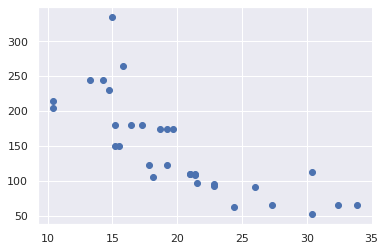

In [93]:
# TO DO : Create a scatter plot with mpg and hp by providing xlabel and ylabel
plt.scatter(x='mpg',y='hp',data=data11)


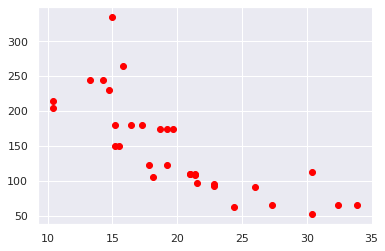

In [94]:
# TO DO: Change the color to red in the previous code
plt.scatter(x='mpg',y='hp',data=data11,color='red')


In [95]:
# TO DO: Create crosstab for cyl(cylinder) and columns as count

# A cross-tabulation (or crosstab) is a two- (or more) dimensional table that records the number (frequency) of 
# respondents that have the specific characteristics described in the cells of the table.
pd.crosstab(data11.cyl,data11.cyl)



cyl,4,6,8
cyl,,,
4,11,0,0
6,0,7,0
8,0,0,14


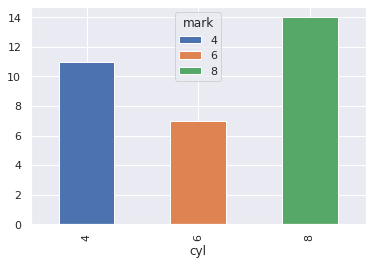

In [96]:
# Other way to create the crosstab
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(data11.cyl, data11.cyl)

ct.plot.bar(stacked=True)    # Try staked=False and then by removing stakced part
plt.legend(title='mark')   # Optional

plt.show()


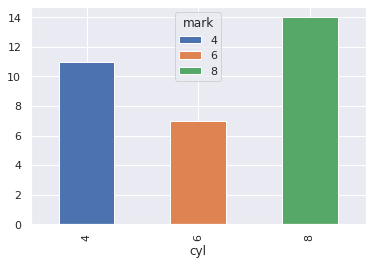

In [97]:
# TO DO: Create crosstab for cyl(cylinder) and am as 'ct2' and create a bar plot

# Reading reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

ct2=pd.crosstab(data11.am,data11.am)
ct.plot.bar(stacked=True)    # Try staked=False and then by removing stakced part
plt.legend(title='mark')   # Optional

plt.show()



([<matplotlib.patches.Wedge at 0x7f259a6eb9d0>,
 [Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-1.0336619083043852, 0.3762220877627163, ''),
  Text(0.19101308558899313, -1.083288512416601, '')])

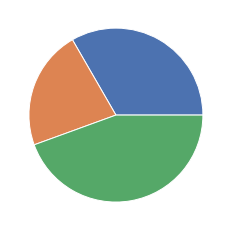

In [103]:
# TO DO: Create a pie chart for cyl count
typelabels=data11['cyl'].unique()
plt.pie(typelabels)


